# 1. 선 그래프 (Line plot) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x와 y의 원소개수는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
x = np.linspace(1, 10, num=100)  # 1 ~ 10을 100등분했을때 분위값으로 구성된 1차원 배열.

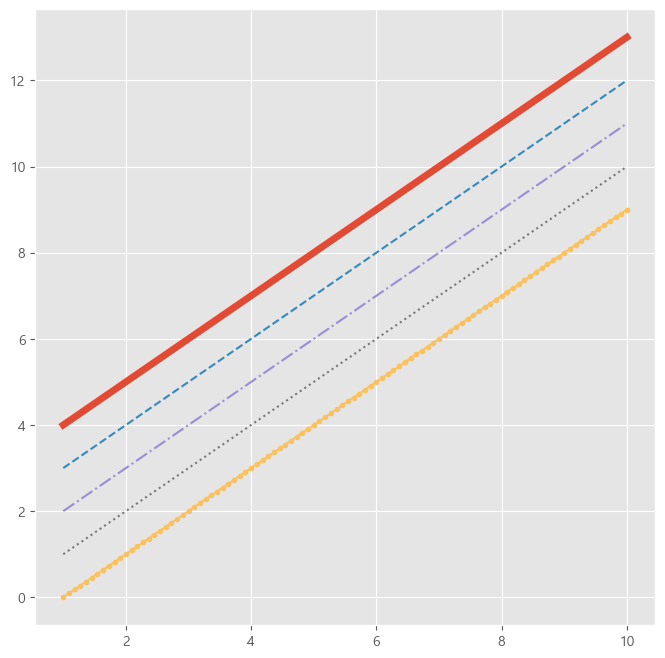

In [2]:
plt.figure(figsize=(8,8))
plt.plot(x, x + 3, linewidth=5)
plt.plot(x, x + 2, linestyle='--')
plt.plot(x, x + 1, linestyle='-.')
plt.plot(x, x, linestyle=':')
plt.plot(x, x - 1, marker='.')
plt.show()

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape

(12, 7)

In [5]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도(㎍/㎥/시)
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


In [6]:
df.rename(columns={df.columns[-1]:'최대농도'}, inplace=True)
df.head()

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354


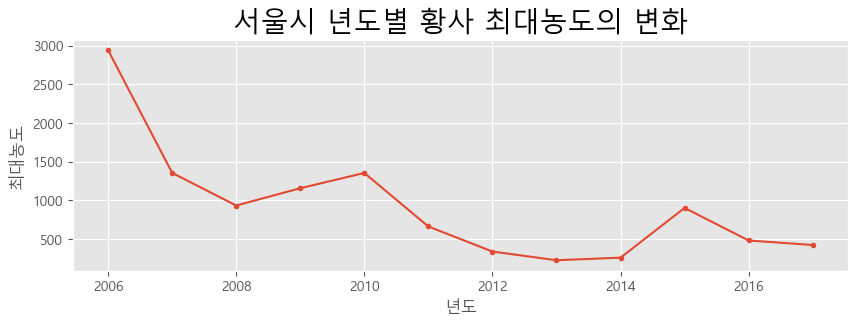

In [9]:
# 년도에 따른 황사 최대농도 변화
# X축: 날짜,시간, y축: 변화량을 보려는 값
plt.figure(figsize=(10, 3))
plt.plot(df['년도'], df['최대농도'], marker='.')
plt.xlabel("년도")
plt.ylabel("최대농도")
plt.title("서울시 년도별 황사 최대농도의 변화", fontsize=20)
plt.grid(True)
plt.savefig("황사선그래프.png") #파일로 저장. 
plt.show()

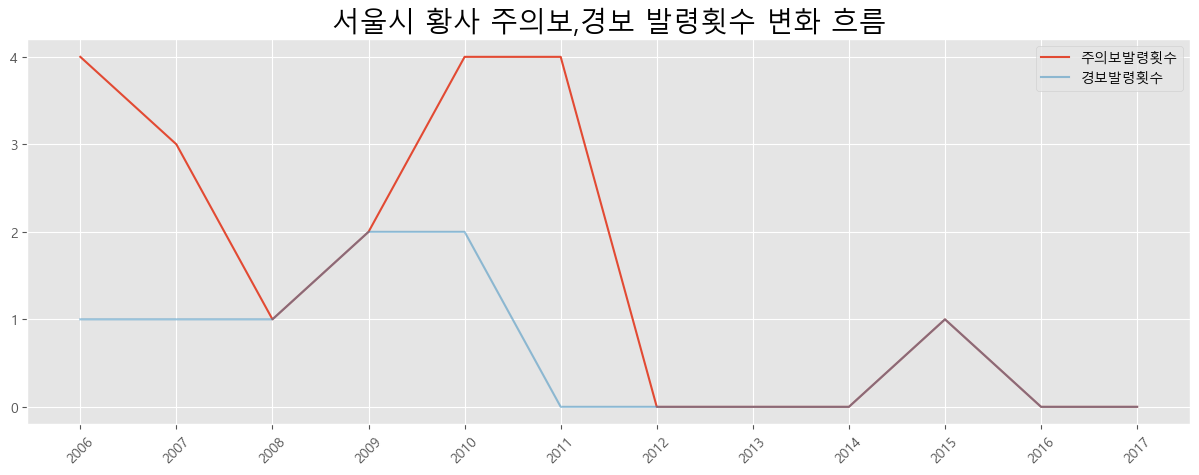

In [10]:
# 년도에 따른 주의보와 경보 발령 횟수의 변화를 한 subplot(axes)에서 비교하도록 그리기.
plt.figure(figsize=(15,5))

plt.plot(df['년도'], df['주의보 발령횟수'], label='주의보발령횟수')
plt.plot(df['년도'], df['경보 발령횟수'], label='경보발령횟수', alpha=0.5)
# alpha: 투명도 - 0 ~ 1  => 0으로 갈수록 투명.

plt.title('서울시 황사 주의보,경보 발령횟수 변화 흐름', fontsize=20)

# ytick 
plt.yticks(range(5))
# xtick
plt.xticks(df['년도'], rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

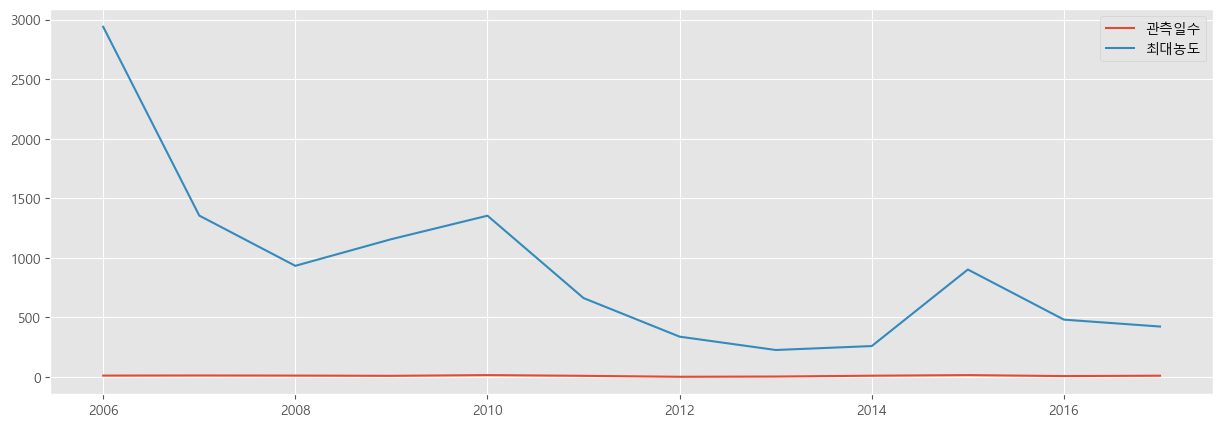

In [11]:
plt.figure(figsize=(15, 5))

plt.plot(df['년도'], df['관측일수'], label='관측일수')
plt.plot(df['년도'], df['최대농도'], label='최대농도')


plt.legend()
plt.show()

In [51]:
df[['최대농도', '관측일수']].agg(["min", "max"])

,최대농도,관측일수
min,226,1
max,2941,15


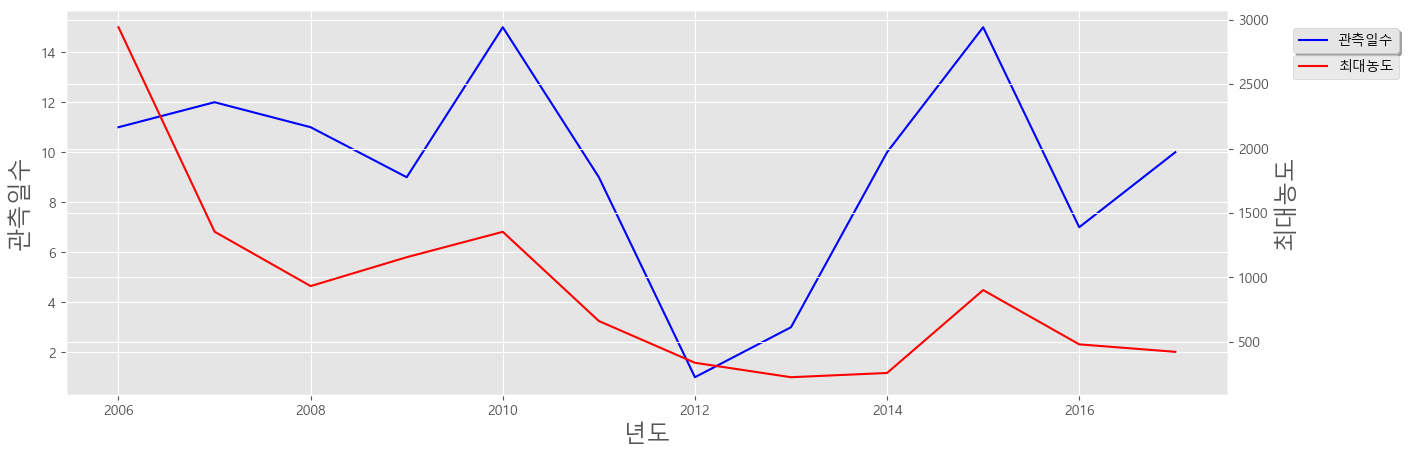

In [12]:
# twinx를 이용해서 다른 scale의 그래프를 그리기.
plt.figure(figsize=(15, 5))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df['년도'], df['관측일수'], label='관측일수', color='b')
ax2.plot(df['년도'], df['최대농도'], label='최대농도', color='r')

# ax1.legend(loc="upper left")  #loc="상하, 좌우"
# ax2.legend(loc='upper right')
ax1.legend(bbox_to_anchor=(1.05, 0.97), loc="upper left", shadow=True)
ax2.legend(bbox_to_anchor=(1.05, 0.9), loc='upper left')
# ax1.legend(bbox_to_anchor=(1,1), loc='upper left')
# bbox -> bounding box => legend box
# bbox_to_anchor => bbox를 위치시킬 좌표 (x, y)

# loc -> bbox_to_anchor 좌표에 legend box의 어느부분을 위치시킬지 설정.

# 축 label
ax1.set_xlabel('년도', fontsize=17)
ax1.set_ylabel('관측일수', fontsize=17)
ax2.set_ylabel('최대농도', fontsize=17)
plt.show()

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x축 값, 2번인수 y축 값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
        - x와 y의 원소의 수는 같아야 한다.
    - c/color: 색지정
        - c와 x, y와 같은 원소수를 가지는 Iterable 타입 객체로 설정할 경우 각 마커마다 다른 색상을 설정할 수 있다
    - s: 점 크기 지정
        

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X = range(1, 1001, 50)
Y = range(1, 1001, 50)
Y2 = range(1000, 0, -50)

In [17]:
print(list(X))
print(list(Y2))

[1, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901, 951]
[1000, 950, 900, 850, 800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300, 250, 200, 150, 100, 50]


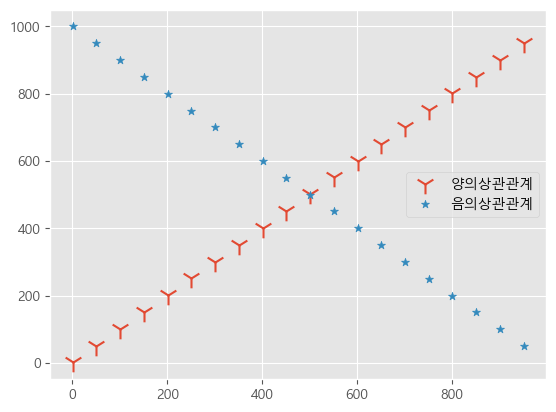

In [28]:
plt.scatter(X, Y, s=200, marker='1', label="양의상관관계")
plt.scatter(X, Y2, marker="*", label="음의상관관계")
plt.legend()
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 정수: 마커의 크기
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

## 2.3 산점도 활용

In [29]:
import pandas as pd

df = pd.read_csv("data/diamonds.csv")
df.shape

(53940, 10)

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df[['carat', 'price']].iloc[:20]

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
5,0.24,336
6,0.24,336
7,0.26,337
8,0.22,337
9,0.23,338


###  캐럿(carat)과 가격(Price)간의 상관관계 시각화

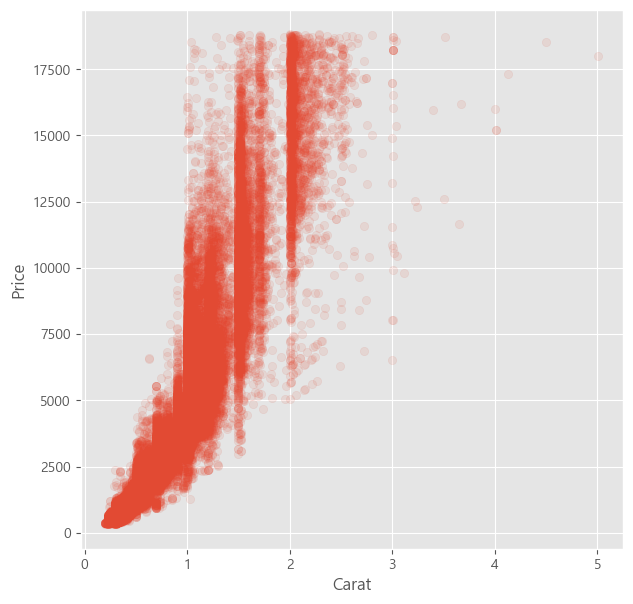

In [36]:
plt.figure(figsize=(7,7))
plt.scatter(df['carat'], df['price'], alpha=0.1)
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [38]:
df[['carat', 'price']].corr()  # 두컬럼간의 상관계수를 계산

,carat,price
carat,1.000000,0.921591
price,0.921591,1.000000


In [49]:
corr_df = df.corr(numeric_only=True)
corr_df

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


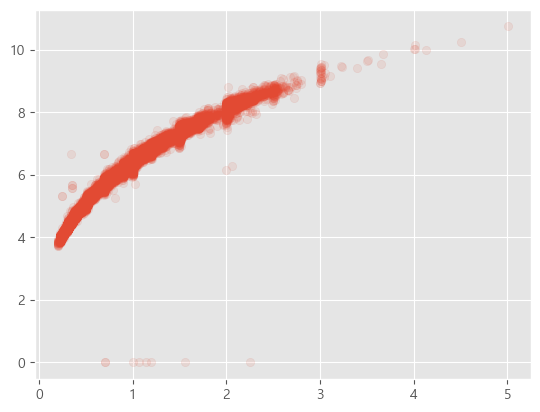

In [42]:
plt.scatter(df['carat'], df['x'], alpha=0.1)
plt.show()

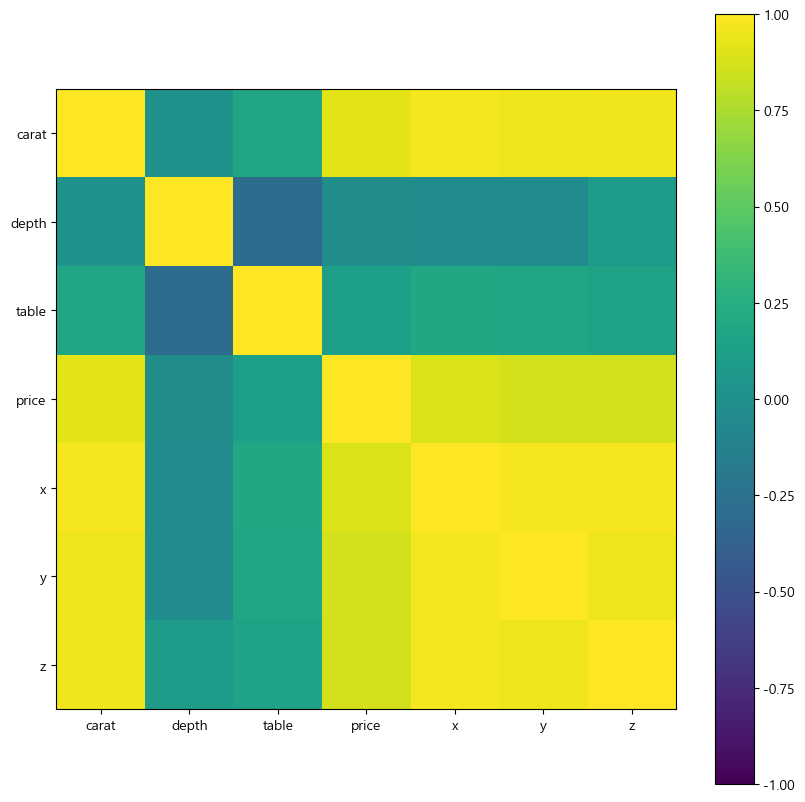

In [52]:
# 데이터프레임으로 여러 컬럼에 대해 계산한 상관 계수들을 heatmap으로 시각화.
plt.style.use('default')
plt.figure(figsize=(10, 10))
plt.imshow(df.corr(numeric_only=True), vmin=-1, vmax=1)
plt.xticks(range(corr_df.columns.size), labels=corr_df.columns)
plt.yticks(range(corr_df.columns.size), labels=corr_df.columns)
plt.colorbar()
plt.show()

> - 상관계수 
>     - 두 변수간의 상관관계(비례/반비례)를 정량적(수치적)으로 계산한 값.
>         - 양수: 양의 상관관계(비례관계), 음수: 음의 상관관계(반비례관계)
>             - 양: 0 ~ 1,  음: -1 ~ 0
>         - 절대값 기준 1로 갈수록 강한상관관계, 0으로 갈수록 약한 상관관계
>             - 1 ~ 0.7: 아주 강한 상관관계
>             - 0.7 ~ 0.3 : 강한 상관관계
>             - 0.3 ~ 0.1 : 약한 상관관계
>             - 0.1 ~ 0 : 관계없다.

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량/값의 크기를 비교하기 위해 막대 형식으로 나타낸 그래프
- 범주형 데이터의 class별 개수를 확인할 때 사용
- bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비  
- 매개변수
    - 첫번째: 수량을 셀 대상
    - 두번째: 수량

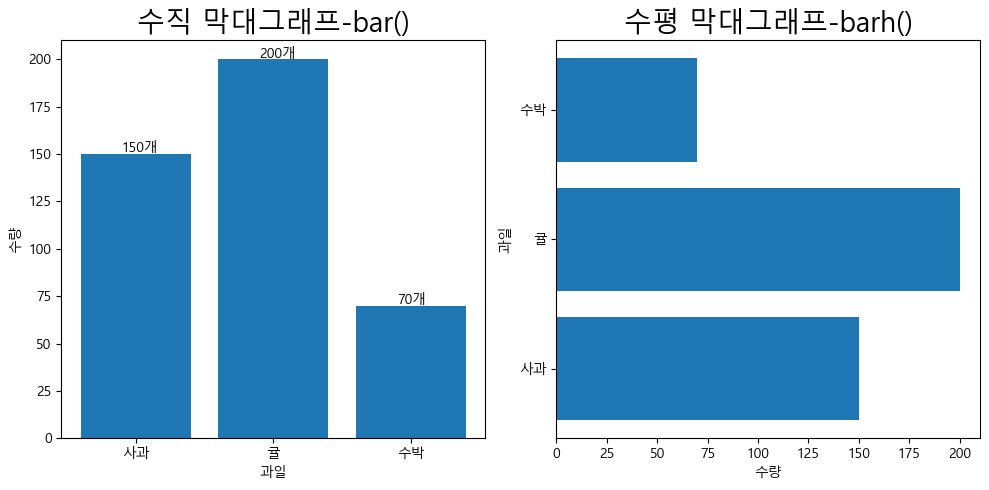

In [68]:
X = ['사과', '귤', '수박']
y = [150, 200, 70]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(X, y)#, width=0.5 : 막대 두께조절 0 ~ 1 실수
plt.xlabel("과일")
plt.ylabel("수량")
plt.title("수직 막대그래프-bar()", fontsize=20)

for x_coor, y_coor in enumerate(y): #(0, 150), (1, 200), (2, 70)
    plt.text(x_coor-0.1, y_coor+1, f'{y_coor}개')

plt.subplot(1, 2, 2)
plt.barh(X, y) #, height=0.2 -> 막대 두께 조절.
plt.xlabel("수량")
plt.ylabel('과일')
plt.title('수평 막대그래프-barh()', fontsize=20)
plt.tight_layout()
plt.show()


In [73]:
mean_v = df[["x", "y", "z"]].mean()
mean_v

x    5.731157
y    5.734526
z    3.538734
dtype: float64

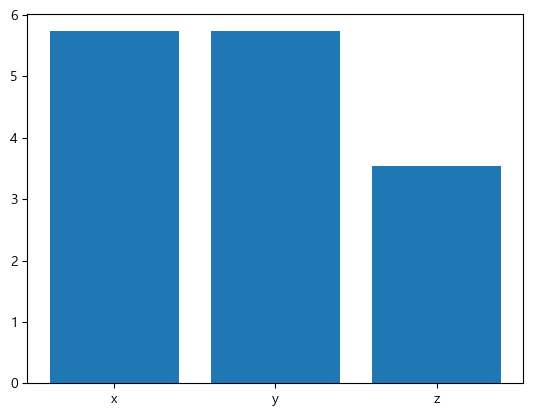

In [74]:
plt.bar(mean_df.index, mean_v)
plt.show()

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)

In [76]:
df = pd.read_excel("data/강수량.xlsx", index_col="계절")
# df.set_index("계절")
df

,2009,2010,2011,2012,2013,2014,2015,2016,2017
계절,,,,,,,,,
봄,231.3,302.9,256.9,256.5,264.3,215.9,223.2,312.8,118.6
여름,752.0,692.6,1053.6,770.6,567.5,599.8,387.1,446.2,609.7
가을,143.1,307.6,225.5,363.5,231.2,293.1,247.7,381.6,172.5
겨울,142.3,98.7,45.6,139.3,59.9,76.9,109.1,108.1,75.6


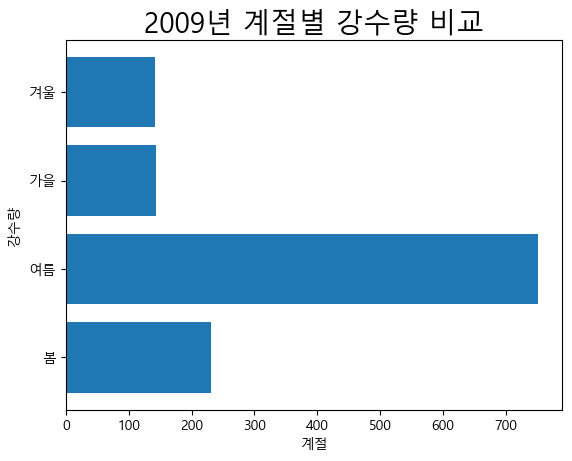

In [81]:
# 2009년 계절별 강수량을 비교.
# plt.bar(df.index, df[2009])
plt.barh(df.index, df[2009])
plt.title('2009년 계절별 강수량 비교', fontsize=20)
plt.xlabel('계절')
plt.ylabel('
           
           
           강수량')
plt.show()